# INFO 370 Problem Set 5: T-testing
*Name:* Israel Martinez

## 1 Is Beijing more expensive than Seattle? (50pt)
You will proceed as follows: first, you compute the difference between the average log price in Beijing and Seattle. Thereafter you create two samples of random normal numbers as in the data above, using the mean and standard deviation over combined Beijing and Seattle listings. Call one of these samples “fake Beijing” and the other “fake Seattle”. What is the difference of their means? And now you repeat this exercise many-many times and see if you can get as big a difference between the fake Beijing and fake Seattle as there is between real Beijing and real Seattle.

1. (2pt) load the data beijing-seattle-airbnb-price.csv. It contains two variable: city (Beijing/Seattle) and price (in USD).

    Perform basic description of it: what is the number of observations? Are there any missings or otherwise invalid entries?

In [1]:
import pandas as pd
import numpy as np
from statistics import mean

In [30]:
abnb = pd.read_csv("./data/beijing-seattle-airbnb-price.csv.bz2", sep="\t")
abnb

,city,price
0,Beijing,401
1,Beijing,436
2,Beijing,479
3,Beijing,415
4,Beijing,317
...,...,...
990,Seattle,275
991,Seattle,75
992,Seattle,99
993,Seattle,140


In [3]:
abnb.shape

(995, 2)

In [4]:
abnb.isna().sum()

city     0
price    0
dtype: int64

There are 995 observations and 0 invalid entries.

2. (3pt) Describe the price: compute the mean, median, standard deviation, and range. According to these figures, which city is more expensive, Beijing or Seattle?

In [5]:
mSeattle = abnb[abnb.city == 'Seattle'].price.mean()
medSeattle = abnb[abnb.city == 'Seattle'].price.median()
stdSeattle = abnb[abnb.city == 'Seattle'].price.std()
minSeattle = abnb[abnb.city == 'Seattle'].price.min()
maxSeattle = abnb[abnb.city == 'Seattle'].price.max()
mSeattle, medSeattle, stdSeattle, minSeattle, maxSeattle

(210.64661654135338, 149.0, 244.3357941629997, 30, 1002)

### Seattle's prices
mean: 210.64661654135338, median: 149.0, STD: 244.3357941629997, range: 30-1002

In [6]:
mBeijing = abnb[abnb.city == 'Beijing'].price.mean()
medBeijing = abnb[abnb.city == 'Beijing'].price.median()
stdBeijing = abnb[abnb.city == 'Beijing'].price.std()
minBeijing = abnb[abnb.city == 'Beijing'].price.min()
maxBeijing = abnb[abnb.city == 'Beijing'].price.max()
mBeijing, medBeijing, stdBeijing, minBeijing, maxBeijing

(365.2921810699589, 296.0, 274.22086621736156, 77, 4097)

### Beijings's prices
mean: 365.2921810699589, median: 296.0, STD: 274.22086621736156, range: 77-4097

According to these figures, Beijing is more expensive than Seattle.

Below, we are going to do t-test. However, t-test works best if the data is normally distributed. However, price data is typically distributed approximately log-normally, not normally. (Log-normal is a distribution of such RV where distribution of log of it is normal.)

3. (3pt) Demonstrate that the data is approximately log-normally distributed: plot histograms of price and log price. Comment the shape of the histograms.

In [44]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt

Used example from this [Stack Overflow post](https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib).

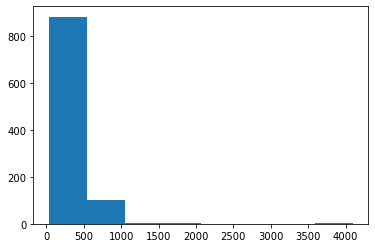

In [45]:
prices = pd.Series(abnb.price)
hist, bins, _ = plt.hist(prices, bins=8)

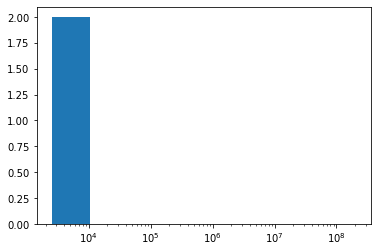

In [53]:
logbins = np.logspace(np.log(bins[0]),np.log(bins[-1]),len(bins))
plt.hist(prices, bins=logbins)
plt.xscale('log')
plt.show()

From now on we work only in log-price.

4. (1pt) Convert price to logs.

In [57]:
abnb['logPrice'] = np.log(abnb['price'])

5. (4pt) Compute the mean difference between Beijing and Seattle listings. (The answer is 0.739.)

In [58]:
sea = abnb[abnb.city == "Seattle"].logPrice
bei = abnb[abnb.city == "Beijing"].logPrice
len(sea), len(bei)

(266, 729)

In [59]:
diff = bei.mean() - sea.mean()
diff

0.7391737097578872

This was the basic description of the data. Now onward to the comparison. We proceed as follows: Imagine that there is no real difference between Beijing and Seattle prices. We call this null-hypothesis H0. Hence whatever difference we see in the actual data is just random sampling noise. We would like to have a huge number of listings to test it, but unfortunately we do not have that. So we do this instead: we create fake Beijing listings and fake Seattle listings, both drawn from the same distribution. There must be as many fake ones as there are real ones in the data. Thereafter we compare the mean price: how much more expensive are the fake Beijing prices compared to fake Seattle prices? We repeat this process many times and at the end we report how often did we find a difference that is similar to what we observe in the real data. If this is a common occurrence, we cannot reject H0.

6. (5pt) Let’s state our H0 again: Beijing and Seattle listings are of similar price (in average). Hence we have to create fake Beijing and fake Seattle prices using the same distribution. The obvious choice for this is the distribution of combined Beijing and Seattle log prices.

Compute the overall mean µ0 and standard deviation σ0 of combined
Beijing and Seattle prices.

Hint: the standard deviation is 0.642.

In [66]:
R = 995
np.random.normal(size=R).mean()

-0.06537863429105163

In [67]:
mu = abnb.logPrice.mean()
sigma = abnb.logPrice.std()
mu, sigma

(5.563792307809865, 0.6416408826270507)

In [68]:
np.random.normal(mu, sigma, size=R).std()

0.6550129818025542

The overall mean is 5.563 and the standard deviation is 0.655

In [69]:
nsea = np.sum(abnb.city == "Seattle")
nbei = np.sum(abnb.city == "Beijing")
nsea, nbei

(266, 729)

7. (5pt) Now create two sets of random normals, “fake Beijing” and “fake Seattle”, both with the same mean µ0 and standard deviation σ0 that you just computed above. The number of fake prices must be the same as the number of real prics for the corresponding city in the data. What is the difference between the average fake Beijing prices and average fake Seattle prices? Compare the result with the real difference you found above.

Hint: say, the average is 5 and standard deviation is 0.5. You can
create the corresponding normals like:

In [71]:
fake_sea = np.random.normal(mu, sigma, size=nsea)
fake_bei = np.random.normal(mu, sigma, size=nbei)
fake_bei.mean() - fake_sea.mean()

0.03194189841984585

The computed mean for the fake prices are 0.032. This is about 0.7 difference than the mean found in the real data.

8. (5pt) Now repeat the previous question a large number R (1000 or more) times. Each time store the mean difference between fake Beijing and fake Seattle, so you end up with R different values for the mean difference.

In [73]:
bs_diff = np.empty(shape=R)
for i in range(R):
    fake_sea = np.random.normal(mu, sigma, size=nsea)
    fake_bei = np.random.normal(mu, sigma, size=nbei)
    bs_diff[i] = fake_bei.mean() - fake_sea.mean()

0.0023311794504882106

9. (5pt) What is the mean of the mean differences? If you did your simulations correctly, it should be close to 0. Explain why do you get this result.

In [74]:
bs_diff.mean()

0.0023311794504882106

I get this result that is close to 0 because I'm taking the random normal mean multiple times. The more I do that, the closer it gets to 0.

10. (4pt) What is the largest mean difference (in absolute value) in your sample?

Hint: np.abs computes absolute value.

In [77]:
np.abs(bs_diff.max())

0.14418116680292492

The largest mean is 0.144.

11. (7pt) find 95% confidence interval (CI) of your sample of mean differences based on sample quantiles. Does the difference in actual data, 0.739 in favor of Beijing, fall into the CI?

Hint: use np.percentile(2.5) and a similar expression for the 97.5th
percentile.

In [78]:
np.abs(np.percentile(bs_diff, [2.5, 97.5]))

array([0.09168599, 0.09186222])

The 95% confidence interval is 0.092.

12. (7pt) Finally, based on the simulations, what is your conclusion: is the observed difference 0.739 just a random fluke, or are prices in Beijing really more expensive than in Seattle?

I'm not sure if prices in Beijing are truly more expensive than in Seattle because the observed difference in the random data is not close to the observes difference in the real data.

## 2 Now repeat the above with t-test (40pt)
Above we spent a lot of effort with sampling, random numbers and such. In practice, it is usually not possible to sample millions of listings. And even if feasible, it is much easier just to do a t-test. Below we ask you to compute the t-value yourself, do not use any pre-existing functions!

1. (10pt) Compute standard error SE of the Beijing-Seattle mean difference. Remember: we are still working in logarithms!

Hint: read OIS 7.3, p 267. You probably have to walk back and read
about various other concepts the book is using in 7.3.

In [90]:
ns = len(sea)
nb = len(bei)
sigma2 = sea.var()/ns + bei.var()/nb
sigma = np.sqrt(sigma2)
sigma

0.04633138016822794

I wasn't sure if I did this correctly, so I used method 2 on this [page](https://www.statology.org/standard-error-of-mean-python/). I don't know which if either are correct.

In [91]:
np.std(abnb.logPrice, ddof=1) / np.sqrt(np.size(abnb.logPrice))

0.020341383474748082

2. (10pt) Compute 95% CI.

Use the 5% two-tail significance level to look up tcr values in t-distribution table. OIS has such a table in Appendix C.2, and google
can find a million more similar tables. 95% CI is given by µ±tcr · SE where µ is the mean, SE is its standard error, and tcr is the critical value from the table.

Hint 1: what is the degrees of freedom in current case? Consult OIS
7.3.

Hint 2: we need 2-tailed test as Beijing can be both cheaper and more
expensive than Seattle.

Hint 3: you can do this in two ways. Compute 95% CI around H0
value (i.e. difference is 0) and check if the actual difference fits in there (this is what we simulated above). Or compute 95% CI around
the actual value, and check of H0 value 0 fits in there (this is what we did in Lab05 Q2). DO NOT compute 95% around actual value and
then check if the actual value fits in there. It always does!

In [106]:
from scipy.stats import ttest_ind

In [107]:
seaPrices = abnb[abnb.city == 'Seattle'].logPrice.values
beiPrices = abnb[abnb.city == 'Beijing'].logPrice.values
ttest_ind(seaPrices, beiPrices)

Ttest_indResult(statistic=-18.688396386351982, pvalue=5.1226243536716906e-67)

3. (6pt) What will you conclude based on CI: can you reject H0, Beijing and Seattle are of equally expensive, at 5% level?

I reject H0, Beijing and Seattle are of equally expensive, at 5% level.

4. (8pt) Now perform the opposite operation: compute the t-value. When the you have mean µ and standard error SE, you can compute the tvalue by t = µ / SE

Hint: the answer is 15.98

In [105]:
diff / sigma

15.954061957014193

My answer is almost 15.98. I might've done a small miscalculation, I'm just not sure how sensitive the formulas are.

5. (6pt) What is the likelihood that such a t value happens just by random chance? Consult the t-table.

Hint: I have never seen t-tables that contain such large values. But
where on the table would you write this value? What can you say
about how likely it is to see such a value just by random chance?

The largest values on the t-table that ours falls between is 12.71 and 31.82. I don't remember everything about how to use a t-table, but I believe this tells me that the likelihood of it being by chance is 2-5%.

## 3 Use canned t-test function (10pt)
Finally, we use a ready-made library: scipy.stats.ttest_ind contains
ready-made t-test function.

Remember: work with log price!

1. (5pt) Compute t-value and the probability using ttest_ind.

Note: you have to specify equal_var=False to tell the function that
Beijing and Seattle price may have different variance.

In [108]:
seaPrices = abnb[abnb.city == 'Seattle'].logPrice.values
beiPrices = abnb[abnb.city == 'Beijing'].logPrice.values
ttest_ind(seaPrices, beiPrices, equal_var=False)

Ttest_indResult(statistic=-15.954061957013737, pvalue=7.439441804547704e-44)

2. (5pt) Finally, state your conclusion: is Beijing more expensive than Seattle? Do all of your three methods: simulations, 95% CI, t-value and python’s t-test agree?

My conclusion is that Beijing is more expensive than Seattle. I'm not quite sure how to decipher all the three methods that I attempted, but I'm pretty sure they prove some of that.